In [370]:
import matplotlib.pyplot as plt
import numpy as np
import train_sb3 as train

In [371]:
def plot_log(log_path_list, env_set_path, log_name_list):
    plt.figure(figsize=(10, 10))

    for log_path, log_name in zip(log_path_list, log_name_list):
        log = np.load(log_path, allow_pickle=True)
        train_env_kwargs = np.load(env_set_path, allow_pickle=True)['train_env_kwargs']
        x = log['timesteps'] / (train_env_kwargs['episode_time_steps'])
        y = np.mean(log['results'], axis=1)

        # 定义移动平均函数
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

        # 平滑数据
        window_size = 5
        y_smooth = moving_average(y, window_size)

        # 绘制原始数据和平滑后的数据
        plt.plot(x, y, label=log_name, alpha=0.2)
        plt.plot(x[(window_size - 1):], y_smooth, label=log_name)
    plt.xlabel('Evaluation Episode')
    plt.ylabel('Evaluation Rewards')
    plt.title('Evaluation Rewards Over Episodes')
    plt.grid(True)
    plt.legend()
    plt.show()

In [372]:
ex_name = ['sa_sac_bess_fe_20250318-205138', 'sa_sac_bess_fe_20250318-212928', 'sa_sac_bess_fe_20250318-215427',
           'sa_sac_bess_fe_20250318-222354', 'sa_sac_bess_fe_20250318-224657', 'sa_sac_bess_fe_20250318-233342',
           'sa_sac_bess_fe_20250319-000233', 'sa_stack_sac_bess_fe_20250319-003812', 'sa_stack_sac_bess_fe_20250319-021238']

ex_idx = ['all observation', 'about BESS without time', 'about BESS', 'only time', 'about BESS without pre', 'all observation without pre', 'all observation with norm', 'all observation with norm and stack', 'Enhance']

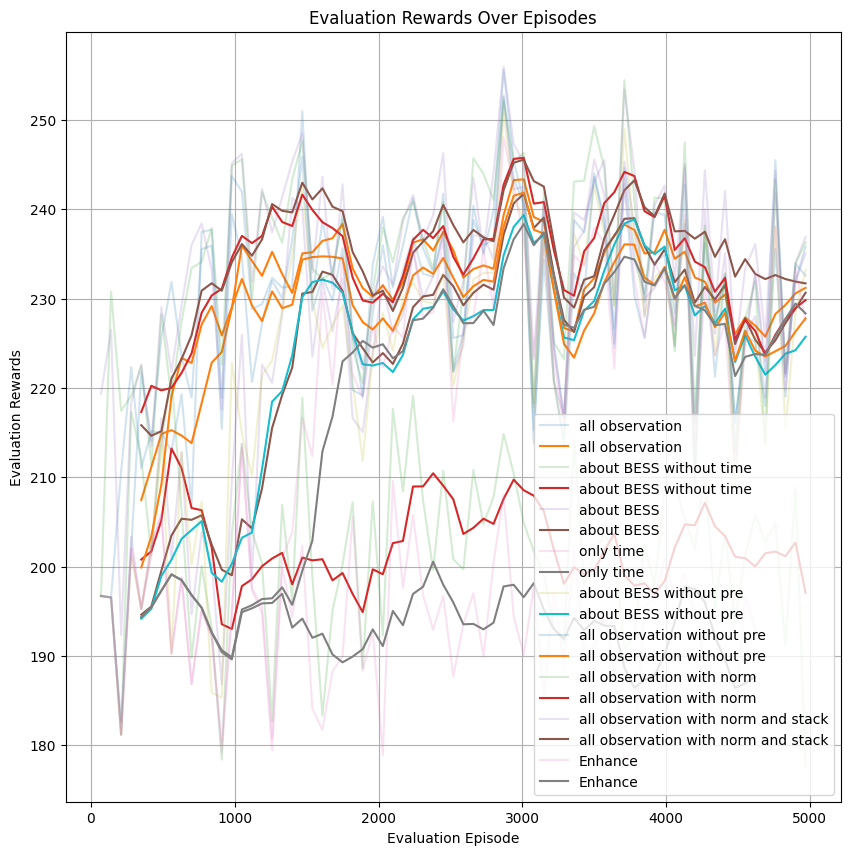

In [373]:
log_path_list = []
for ex_name in ex_name:
    checkpoint_path_dict = train.checkpoint_path(ex_name, 0, 0)
    log_path = checkpoint_path_dict['log_path'] + '/evaluations.npz'
    log_path_list.append(log_path)

plot_log(log_path_list, train.checkpoint_path(ex_name, 0, 0)['env_set_path'], ex_idx)